This code proposes a simple yet effective numerical solver for general Friedmann-Lemaître equations. The main class is <font face="monaco">w0waCDM</font>. To be initialized, the cosmological model requires at least the Hubble constant <font face="monaco">H0</font> in km/s/Mpc, the cold dark matter (<font face="monaco">Om0</font>) and the dark energy density (<font face="monaco">Ode0</font>) parameters, that is to say the current ratio of each density over the critical one. It is possible to modify CMB's current temperature (default is 2.72 K) as well as the dark energy's equation of state :
 
 \begin{equation}
 w(a) = w_0 + w_a (a-1)
 \end{equation}

 By default, the dark energy is treated as a cosmological constant, ie $(w_0,w_a)=(-1,0)$. 

Calling the class automatically solves the Friedmann-Lemaître equation. The main function is the scale parameter $a$ with respect to the cosmic time $t$. The time unit is the Hubble time $H_0^{-1}$, so the solver works with values close to 1 ; <font face="monaco">hubble_time_gyr</font> attribute is computed to use gigayears instead if needed. Every function is parametrized by time and interpolated from $-H_0^{-1}$ to $H_0^{-1}$ with t=0 corresponding to now. Cosmological models where the Universe expands then contracts (or the opposite) are also supported. Note that it could not be done with a redshift parametrization, as a turnaround point is equivalent to $\{t \mapsto a(t)\}$ and thus $\{ t \mapsto z(t) \}$ not being bijective. Nonetheless, if $a$ is monotonous, a function $\{z \mapsto t(z)\}$ is defined to allow for a redshift parametrization.

Below is an example yielding $\Lambda$ CDM cosmology with the parameters determined by the <i>Planck</i> mission :

In [1]:
from EFLsolver import w0waCDM

cosmo_LCDM = w0waCDM(H0=67.6,Om0=0.31,Ode0=0.69)

/Users/tanguydusserre/Documents/CODE/EFLsolver/EFLsolver.py:95: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  dadt_a_minus = odeint(self.function_for_solver,X0,time_array_minus)
/Users/tanguydusserre/Documents/CODE/EFLsolver/EFLsolver.py:99: RuntimeWarning: invalid value encountered in divide
  H_array_minus = dadt_a_minus[1:,0]/dadt_a_minus[1:,1]
/Users/tanguydusserre/Documents/CODE/EFLsolver/EFLsolver.py:110: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  dadt_a_minus = odeint(self.function_for_solver,X0,refined_time_array_minus)
/Users/tanguydusserre/Documents/CODE/EFLsolver/EFLsolver.py:112: RuntimeWarning: invalid value encountered in divide
  H_array_minus = dadt_a_minus[1:,0]/dadt_a_minus[1:,1]
/Users/tanguydusserre/Documents/CODE/EFLsolver/EFLsolver.py:129: RuntimeWarning: divide by zero encountered in divide


Age of the Universe : 13.8 Gyr


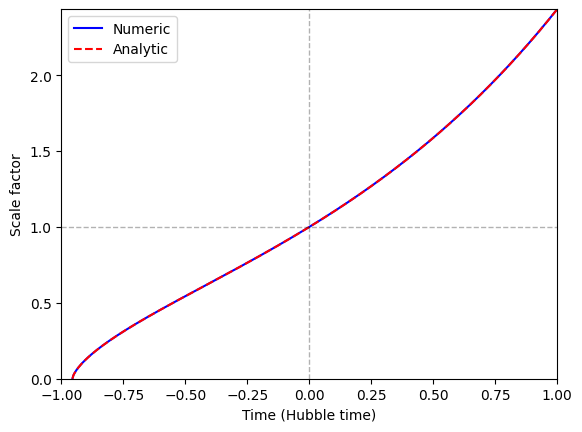

In [17]:
import numpy as np
import matplotlib.pyplot as plt

print(f"Age of the Universe : {-cosmo_LCDM.hubble_time_gyr*cosmo_LCDM.age_past:.1f} Gyr")
time = np.linspace(cosmo_LCDM.age_past,1,500)
analytic_solution_LCDM = (0.31/(1-0.31))**(1/3)*np.sinh(3/2*np.sqrt(1-0.31)*(time-cosmo_LCDM.age_past))**(2/3)

plt.plot(time,cosmo_LCDM.a(time),'b',label='Numeric')
plt.plot(time,analytic_solution_LCDM,'r--',label='Analytic')
plt.plot([0,0],[0,np.max(analytic_solution_LCDM)],'k--',alpha=0.3,linewidth=1)
plt.plot([-1,1],[1,1],'k--',alpha=0.3,linewidth=1)
plt.xlabel("Time (Hubble time)")
plt.ylabel("Scale factor")
plt.xlim([-1,1])
plt.ylim([0,np.max(analytic_solution_LCDM)])
plt.legend()

$w_0 w_a$ CDM cosmology with parameters from DESI DR2 :

Age of the Universe : 13.7 Gyr


/var/folders/6l/x0r51fzj2pg_mlwdm72wgr3c0000gn/T/ipykernel_3462/3818424878.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


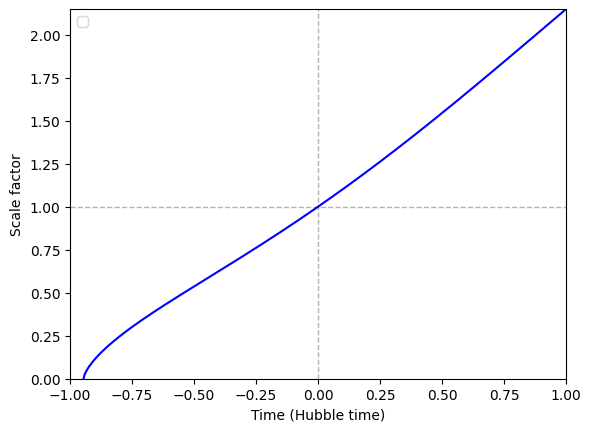

In [18]:
cosmo_DESI = w0waCDM(H0=67.6,Om0=0.31,Ode0=0.69,w0=-0.84,wa=-0.42)

print(f"Age of the Universe : {-cosmo_DESI.hubble_time_gyr*cosmo_DESI.age_past:.1f} Gyr")
time = np.linspace(cosmo_DESI.age_past,1,500)

plt.plot(time,cosmo_DESI.a(time),'b')
plt.plot([0,0],[0,cosmo_DESI.a(1)],'k--',alpha=0.3,linewidth=1)
plt.plot([-1,1],[1,1],'k--',alpha=0.3,linewidth=1)
plt.xlabel("Time (Hubble time)")
plt.ylabel("Scale factor")
plt.xlim([-1,1])
plt.ylim([0,cosmo_DESI.a(1)])

CDM Universe that will undergo a Big Crunch :

Age of the Universe : 11.9 Gyr
Time before Big Crunch : 28.8 Gyr


(0.0, 1.181238686309097)

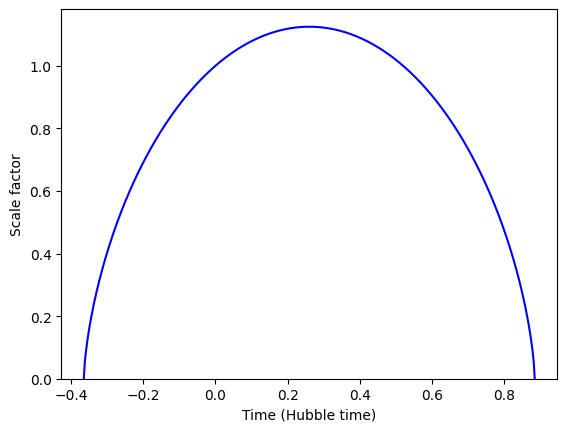

In [25]:
cosmo_collapse = w0waCDM(H0=30,Om0=9,Ode0=0)
time_collapse = np.linspace(cosmo_collapse.age_past,cosmo_collapse.age_future,500)

print(f"Age of the Universe : {-cosmo_collapse.hubble_time_gyr*cosmo_collapse.age_past:.1f} Gyr")
print(f"Time before Big Crunch : {cosmo_collapse.hubble_time_gyr*cosmo_collapse.age_future:.1f} Gyr")

plt.plot(time_collapse,cosmo_collapse.a(time_collapse),'b')
plt.xlabel("Time (Hubble time)")
plt.ylabel("Scale factor")
plt.ylim([0,None])